# Horizontal geoms

`geom_linerange()`, `geom_pointrange()`, `geom_errorbar()`, `geom_crossbar()`, `geom_ribbon()` can be represented horizontally by assigning `y`, `xmin`, `xmax` aesthetics.
For horizontal geoms you need to use orthogonal functions like `position_dodgev()`(as opposed to using `coord_flip()`).

In [1]:
import numpy as np
import pandas as pd

from lets_plot import *


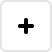
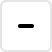
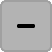
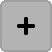
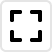
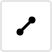
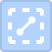
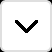
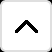
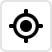
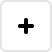
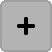
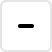
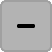
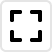
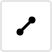
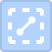
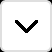
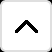
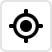

In [2]:
LetsPlot.setup_html()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/ToothGrowth.csv")
err_df = df.groupby(by=['supp', 'dose']).agg({'len': ['min', 'max', 'median']}).reset_index()
err_df.columns = ['supp','dose', 'len_min', 'len_max', 'length']
err_df

,supp,dose,len_min,len_max,length
0,OJ,0.5,8.2,21.5,12.25
1,OJ,1.0,14.5,27.3,23.45
2,OJ,2.0,22.4,30.9,25.95
3,VC,0.5,4.2,11.5,7.15
4,VC,1.0,13.6,22.5,16.50
5,VC,2.0,18.5,33.9,25.95


In [17]:
p = ggplot(err_df, aes(y='dose', x='length', xmin='len_min', xmax='len_max', color='supp')) +\
    xlab("Tooth length [mm]")

gggrid([
    p + geom_errorbar(position=position_dodgev(0.95)) + ggtitle('geom_errorbar()'),
    p + geom_crossbar(position=position_dodgev(0.95)) + ggtitle('geom_crossbar()'),
    p + geom_pointrange(position=position_dodgev(0.95)) + ggtitle('geom_pointrange()'),
    p + geom_linerange(position=position_dodgev(0.95)) + ggtitle('geom_linerange()'),
    p + geom_ribbon() + ggtitle('geom_ribbon()')
], ncol=2, he vspace=20.0)